In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-depression-machine-learning-challenge/sample_submission.csv
/kaggle/input/predicting-depression-machine-learning-challenge/train.csv
/kaggle/input/predicting-depression-machine-learning-challenge/test.csv


# **Data Loading**

In [2]:
train = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/train.csv')
test = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/test.csv')

submission = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/sample_submission.csv')

# **Data Preprocessing and Feature Engineering**

In [3]:
from sklearn.preprocessing import LabelEncoder

train["is_profession_missing"] = train["Profession"].notna().astype(int)
#train["is_Work_Pressure_missing"] = train["Work Pressure"].notna().astype(int)
#train["is_Job_Satisfaction_missing"] = train["Job Satisfaction"].notna().astype(int)

test["is_profession_missing"] = test["Profession"].notna().astype(int)
#test["is_Work_Pressure_missing"] = test["Work Pressure"].notna().astype(int)
#test["is_Job_Satisfaction_missing"] = test["Job Satisfaction"].notna().astype(int)


# Fill missing values
for col in ["Degree", "Financial Stress", "Dietary Habits"]:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(train[col].mode()[0], inplace=True)

for col in ["Work Pressure", "Job Satisfaction"]:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(train[col].median(), inplace=True)

train["Profession"].fillna("Unknown", inplace=True)
test["Profession"].fillna("Unknown", inplace=True)

# Drop unnecessary columns
train.drop(["Academic Pressure", "CGPA", "Study Satisfaction"], axis=1, inplace=True)
test.drop(["Academic Pressure", "CGPA", "Study Satisfaction"], axis=1, inplace=True)

# Encode categorical columns
categorical_columns = ['Gender', 'Working Professional or Student','Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])  
    label_encoders[col] = le  

<ipython-input-3-d2d664fda7f5>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
<ipython-input-3-d2d664fda7f5>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [4]:
#health_status = ['Healthy', 'Unhealthy', 'Moderate', 'More Healthy', 'No Healthy', 'Less Healthy', '5 Healthy', '5 Unhealthy', 'Resistant']
Good_Health=['Healthy','More Healthy', '5 Healthy']
Bad_Health=['Unhealthy','No Healthy','Less Healthy','5 Unhealthy']
Moderate_Health=['Moderate','Resistant']
#diet_lifestyle = ['Indoor', 'Electrician', 'MCA', 'Mealy', 'Hormonal', 'Vegas', 'Male', 'Soham', 'Pratham', 'Vivaan', 'Raghav', 'Naina', 'Kolkata']
#education_occupation = ['BSc', 'Class 12', 'Academic', 'MCA']
#other = ['Gender', 'Yes', 'No Healthy', 'Mealy']

# Function to classify values
def classify(value):
    if value in Good_Health:
        return 'Good_Health'
    elif value in Bad_Health:
        return 'Bad_Health'
    elif value in Moderate_Health:
        return 'Moderate_Health'
    else:
        return 'Uncategorized'

# Apply classification
train['Dietary_Habits_new'] = train['Dietary Habits'].apply(classify)
test['Dietary_Habits_new'] = test['Dietary Habits'].apply(classify)

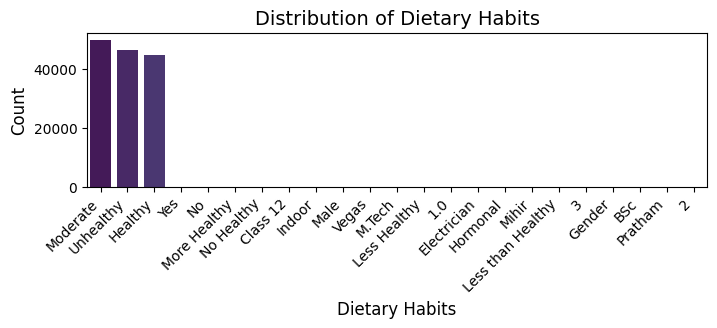

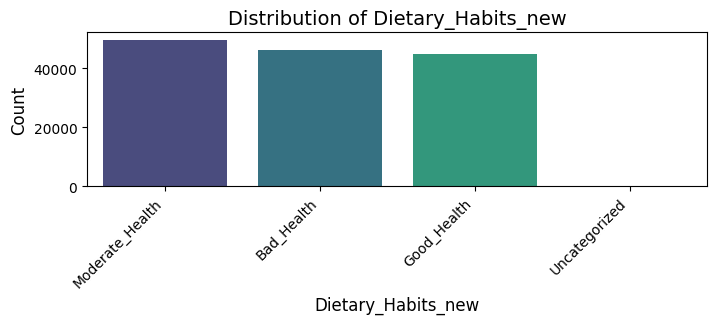

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Dietary Habits'].value_counts()

# Plot
plt.figure(figsize=(8, 2))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Dietary Habits", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Dietary Habits", fontsize=14)

# Show the plot
plt.show()

# Count the values
profession_counts = train['Dietary_Habits_new'].value_counts()

# Plot
plt.figure(figsize=(8, 2))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Dietary_Habits_new", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Dietary_Habits_new", fontsize=14)

# Show the plot
plt.show()

In [5]:
education_map = {
    "High School": ["Class 11", "Class 12"],
    
    "Diploma": [
        "B.Ed", "B.P.Ed", "L.Ed", "LCA", "RCA", "HCA", "N.Pharm", "S.Pharm", 
        "A.Ed", "E.Ed", "I.Ed", "J.Ed", "G.Ed", "K.Ed", "M.B.Ed", "M.M.Ed"
    ],
    
    "Bachelor's": [
        "B.Tech", "BE", "BSc", "B.Sc", "B.Arch", "B.B.Arch", "BBA", "B.Com", "B.Ed", "BCA",
        "B.Pharm", "BPharm", "BPA", "BHM", "B Student", "BArch", "BTech", "B.Com", "B.H", 
        "B.CA", "B.BA", "B.BCA", "B.Press", "B.B.Tech", "B.M.Com", "B.Financial Analyst"
    ],
    
    "Master's": [
        "M.Tech", "M_Tech", "MTech", "ME", "MSc", "MBA", "M.Com", "M.Ed", "MPharm", 
        "M.Pharm", "MPA", "MHM", "M.Arch", "M.S", "M. Business Analyst", "MA", "MCA", 
        "M.UI", "M.", "M.M.Ed"
    ],
    
    "Doctorate": ["PhD", "MD", "MBBS"],
    
    "Law": ["LLB", "LLBA", "LLM", "LL.Com", "LLCom", "LL B.Ed", "LLS", "LLEd"],
    
    "Other": [
        "Plumber", "Entrepreneur", "Working Professional", "Data Scientist", "HR Manager",
        "UX/UI Designer", "Business Analyst", "Doctor", "Mechanical Engineer", "Travel Consultant"
    ]
}

def map_education(value):
    for category, degrees in education_map.items():
        if value in degrees:
            return category
    return "Unknown"

train["Degree_new"] = train["Degree"].apply(map_education)
test["Degree_new"] = test["Degree"].apply(map_education)

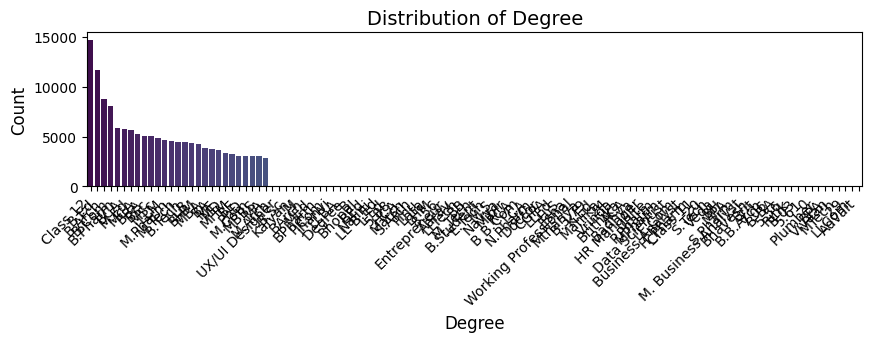

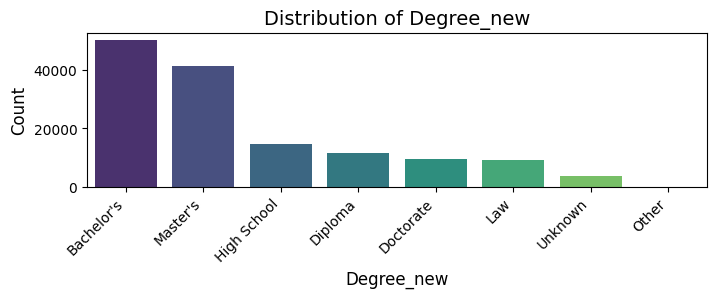

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Degree'].value_counts()

# Plot
plt.figure(figsize=(10, 2))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Degree", fontsize=14)

# Show the plot
plt.show()

profession_counts = train['Degree_new'].value_counts()

# Plot
plt.figure(figsize=(8, 2))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Degree_new", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Degree_new", fontsize=14)

# Show the plot
plt.show()

In [6]:
profession_map = {
    "Education": ["Teacher", "Educational Consultant", "Academic", "B.Ed", "M.Ed"],
    "Healthcare": ["Chemist", "Pharmacist", "Medical Doctor", "Doctor", "Surgeon", "MBBS", "MD", "PhD"],
    "Engineering & Technology": ["Software Engineer", "Mechanical Engineer", "Civil Engineer", "B.Tech", "BE", "BCA", "M.Tech", "ME", "MCA", "M.Pharm"],
    "Business & Finance": ["Financial Analyst", "Investment Banker", "Business Analyst", "Manager", "City Manager", "Entrepreneur", "HR Manager", "Marketing Manager", "Sales Executive", "Consultant", "Digital Marketer"],
    "Law": ["Lawyer", "LLB", "LLBA", "LLM", "LL.Com", "LLCom", "LL B.Ed", "LLS", "LLEd"],
    "Creative & Design": ["Graphic Designer", "Content Writer", "UX/UI Designer", "Architect", "Chef", "Pilot", "Graphic Designer", "Content Writer"],
    "Trades & Services": ["Plumber", "Electrician", "Customer Support", "Travel Consultant"],
    "Research & Analysis": ["Research Analyst", "Analyst", "Researcher", "Data Scientist"],
    "Student & Academic": ["Student", "B.Com", "MBA", "BCA", "MCA", "BBA", "M.Ed"]
    #"Unclassified": ["Unemployed", "No", "Name", "FamilyVirar", "Visakhapatnam", "Yuvraj", "3M", "Manvi", "Samar", "Surat", "Pranav", "Unhealthy"]
}

def map_job(value):
    for category, titles in profession_map.items():
        if value in titles:
            return category
    return "Unknown"

train["Profession_new"] = train["Profession"].apply(map_job)
test["Profession_new"] = test["Profession"].apply(map_job)


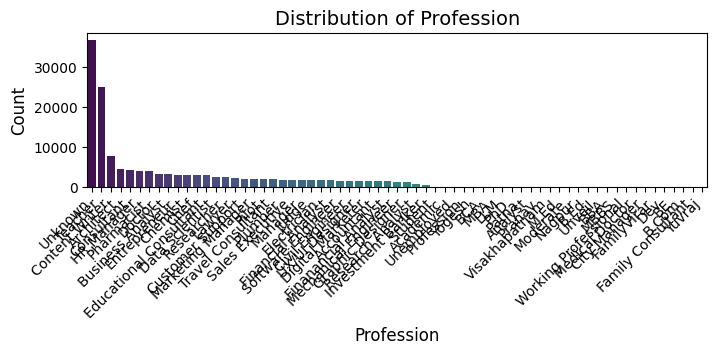

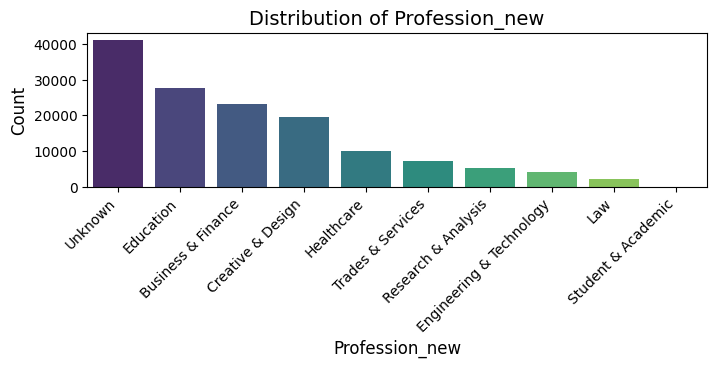

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Profession'].value_counts()

# Plot
plt.figure(figsize=(8, 2))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Profession", fontsize=14)

# Show the plot
plt.show()

# Count the values
profession_counts = train['Profession_new'].value_counts()

# Plot
plt.figure(figsize=(8, 2))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Profession_new", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Profession_new", fontsize=14)

# Show the plot
plt.show()

In [8]:
cities = [
    'Agra', 'Ahmedabad', 'Bangalore', 'Bhopal', 'Chennai', 'Delhi', 'Faridabad', 'Ghaziabad', 'Gurgaon', 'Hyderabad', 'Indore', 'Jaipur', 'Kalyan',
    'Kanpur', 'Kolkata', 'Lucknow', 'Ludhiana', 'Meerut', 'Mumbai', 'Nagpur', 'Nashik', 'Patna', 'Pune', 'Rajkot', 'Srinagar', 'Surat', 'Thane', 
    'Vadodara', 'Varanasi', 'Vasai-Virar', 'Visakhapatnam'
]

def city_map(value):
    if value in cities:
        return value
    return "Unknown"

train["City_new"] = train["City"].apply(city_map)
test["City_new"] = test["City"].apply(city_map)

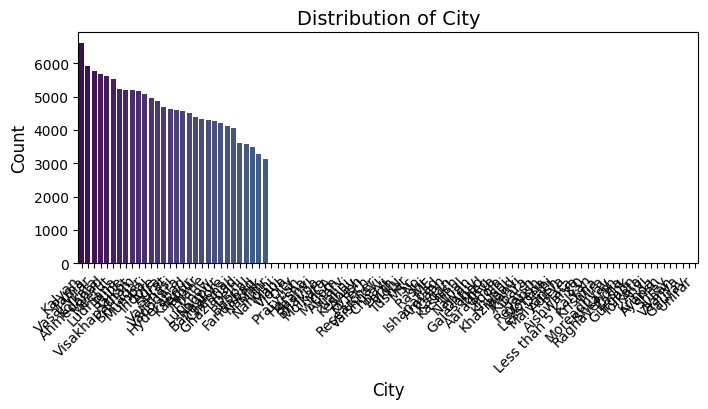

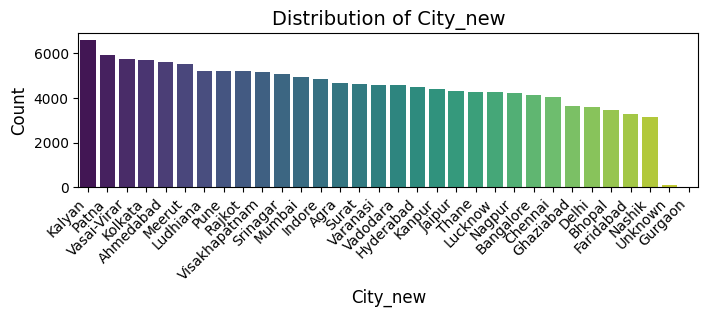

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['City'].value_counts()

# Plot
plt.figure(figsize=(8, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("City", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of City", fontsize=14)

# Show the plot
plt.show()

# Count the values
profession_counts = train['City_new'].value_counts()

# Plot
plt.figure(figsize=(8, 2))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("City_new", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of City_new", fontsize=14)

# Show the plot
plt.show()



In [13]:
train["In_A_City"].value_counts()

In_A_City
1    140603
0        97
Name: count, dtype: int64

In [9]:
def categorize(value):
    # Time-related categories
    short_duration = ['Less than 5 hours', '1-2 hours', '1-3 hours', '3-4 hours', '4-5 hours', '4-6 hours', '2-3 hours', '3-6 hours', '6 hours']
    medium_duration = ['than 5 hours','6-7 hours', '7-8 hours', '6-8 hours', '8 hours','More than 8 hours','8-9 hours','9-10 hours','9-11 hours','10-11 hours']
    long_duration = [ '9-5 hours', '9-6 hours', '10-6 hours', '20-21 hours', '60-65 hours', '50-75 hours', '40-45 hours', '45-48 hours', '55-66 hours', '45 hours', '49 hours']
    
    # Miscellaneous categories
    #ambiguous = ['Meerut', 'Pune', 'Indore', '9-5','0', '8-89 hours', 'Galesabad','Unhealthy', 'Have_you_ever_had_suicidal_thoughts', 'Work_Study_Hours', 'Sleep_Duration', 'Vivan','No']

    if value in short_duration:
        return 'Short Duration'
    elif value in medium_duration:
        return 'Medium Duration'
    elif value in long_duration:
        return 'Long Duration'
    else:
        return 'Unknown'

# Example usage
train['Sleep Duration_new'] = train['Sleep Duration'].apply(categorize)
test['Sleep Duration_new'] = test['Sleep Duration'].apply(categorize)


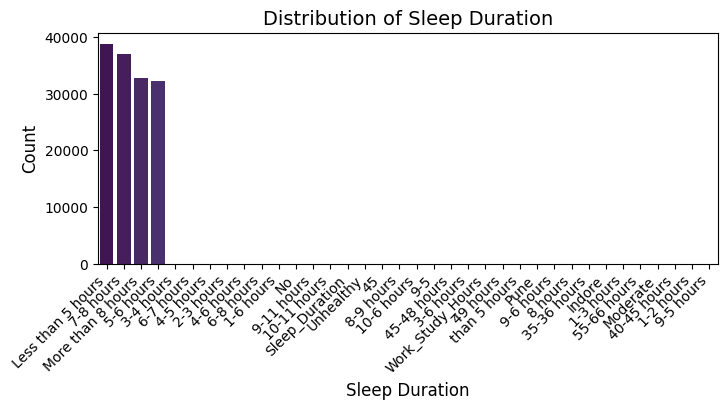

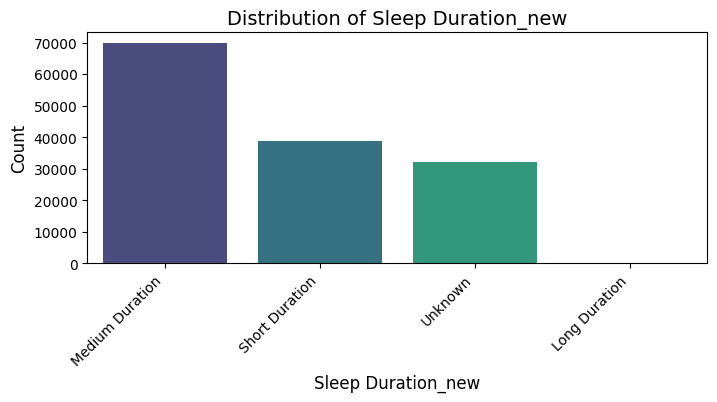

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Sleep Duration'].value_counts()

# Plot
plt.figure(figsize=(8, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Sleep Duration", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Sleep Duration", fontsize=14)

# Show the plot
plt.show()

# Count the values
profession_counts = train['Sleep Duration_new'].value_counts()

# Plot
plt.figure(figsize=(8, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Sleep Duration_new", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Sleep Duration_new", fontsize=14)

# Show the plot
plt.show()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  object 
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140700 non-null  

# **Encoding**

In [10]:
train["new_col"] = train["Work Pressure"] + train["Job Satisfaction"]

In [11]:
df =  pd.concat([train, test], axis =0)

In [12]:
df.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Work Pressure                                0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                               93800
is_profession_missing                        0
Dietary_Habits_new                           0
Degree_new                                   0
Profession_new                               0
City_new     

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

label_encoders = {}
for col in ['City','City_new', 'Dietary Habits','Dietary_Habits_new','Sleep Duration_new','Sleep Duration','Profession','Degree']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

def one_hot_encode_and_add(train, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(train[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = train.index
    train = pd.concat([train, encoded_columns], axis=1)
    train = train.drop(columns=[column])
    return train

columns_to_encode = ['Profession_new', 'Degree_new']

for col in columns_to_encode:
    df = one_hot_encode_and_add(df, col)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 40 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   id                                       234500 non-null  int64  
 1   Name                                     234500 non-null  object 
 2   Gender                                   234500 non-null  int64  
 3   Age                                      234500 non-null  float64
 4   City                                     234500 non-null  int64  
 5   Working Professional or Student          234500 non-null  int64  
 6   Profession                               234500 non-null  int64  
 7   Work Pressure                            234500 non-null  float64
 8   Job Satisfaction                         234500 non-null  float64
 9   Sleep Duration                           234500 non-null  int64  
 10  Dietary Habits                        

In [15]:
train = df.dropna(subset=['new_col'])
test = df[df['new_col'].isna()]

test = test.drop(columns=['new_col'])
train = train.drop(columns=['new_col'])
test = test.drop(columns=['Depression'])

In [23]:
#X=train.drop(columns=['Name'])
#y=train['Depression']

# **Calculating Mutual Info Values**

In [16]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = train.drop(columns=["Depression","Name"])
y = train["Depression"]

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Convert to DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mi_scores})

# Sort features by importance
mi_df = mi_df.sort_values(by="Mutual_Info", ascending=False)

# Display the top features
print(mi_df)


                                    Feature  Mutual_Info
2                                       Age     0.200295
15                    is_profession_missing     0.158440
5                                Profession     0.139933
4           Working Professional or Student     0.138205
28                   Profession_new_Unknown     0.122743
11    Have you ever had suicidal thoughts ?     0.079524
6                             Work Pressure     0.075697
7                          Job Satisfaction     0.068117
10                                   Degree     0.037682
32                   Degree_new_High School     0.035268
13                         Financial Stress     0.030947
12                         Work/Study Hours     0.024108
16                       Dietary_Habits_new     0.020342
21                 Profession_new_Education     0.018536
9                            Dietary Habits     0.017416
1                                    Gender     0.017006
14         Family History of Me

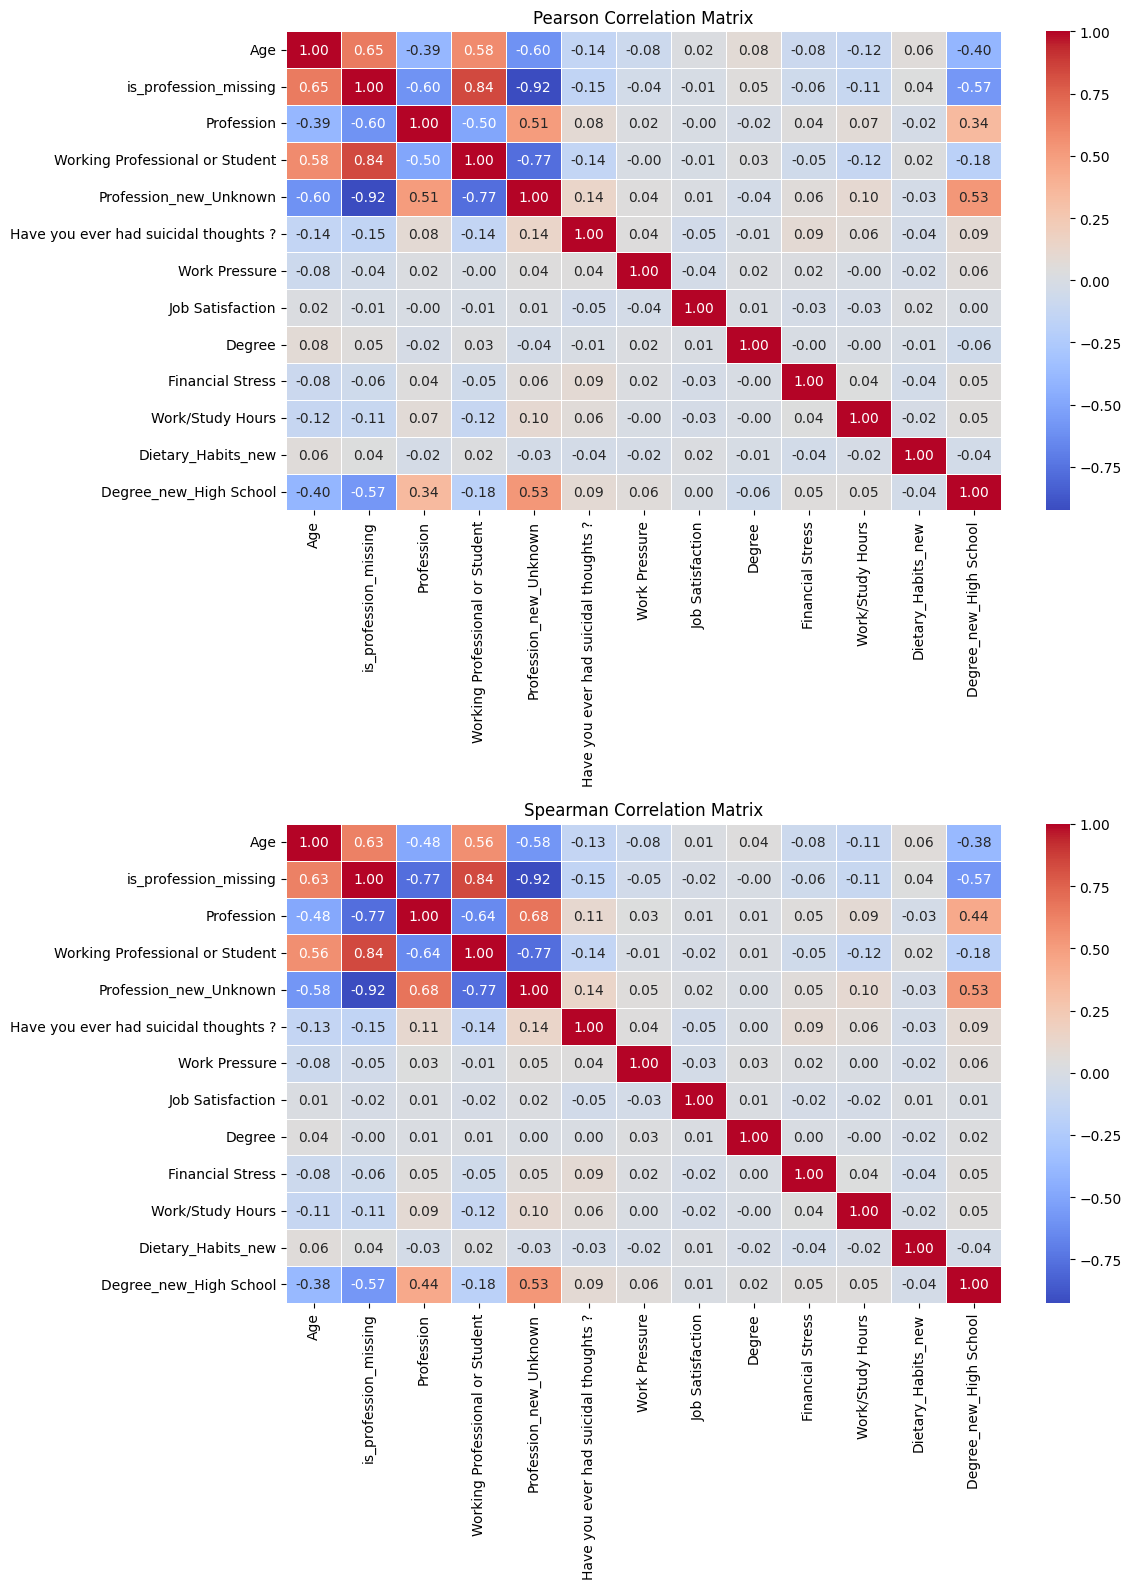

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

X_try = train[['Age', 'is_profession_missing', 'Profession', 'Working Professional or Student', 'Profession_new_Unknown' ,
               'Have you ever had suicidal thoughts ?','Work Pressure','Job Satisfaction','Degree','Financial Stress',
              'Work/Study Hours','Dietary_Habits_new','Degree_new_High School']]

# Compute the Pearson correlation matrix
pearson_corr = X_try.corr(method='pearson')

# Compute the Spearman correlation matrix
spearman_corr = X_try.corr(method='spearman')

# Set up the matplotlib figure (vertical subplots)
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Generate heatmap for the Pearson correlation matrix
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title("Pearson Correlation Matrix")

# Generate heatmap for the Spearman correlation matrix
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title("Spearman Correlation Matrix")

# Show the plot
plt.tight_layout()
plt.show()


In [38]:
from sklearn.model_selection import train_test_split


columns_to_drop_15 = [
    'Profession_new_Law', 'Degree_new_Law', 'Degree_new_Doctorate', 
    'Profession_new_Student & Academic', 'Degree_new_Other', 'In_A_City_0', 
    'Degree_new_Diploma', 'Degree_new_Unknown', 'Profession_new_Research & Analysis', 
    'Profession_new_Trades & Services', 'City_new', 'City', 
    'Profession_new_Engineering & Technology', "Degree_new_Master's", 
    'Profession_new_Creative & Design', 'Name','Depression','id'
]

columns_to_drop = [
    "Profession_new_Trades & Services",
    "City",
    "Profession_new_Research & Analysis",
    "Profession_new_Engineering & Technology",
    "Profession_new_Student & Academic",
    "Profession_new_Law",
    "Degree_new_Diploma",
    "Degree_new_Doctorate",
    "Degree_new_Unknown",
    "Degree_new_Law",
    "Degree_new_Other",
    "id",
    "Name",
    'Depression'
]


# Assuming df is your DataFrame containing the features
columns_to_drop_25 = [
    'Profession_new_Law', 'Degree_new_Law', 'Degree_new_Doctorate', 
    'Profession_new_Student & Academic', 'Degree_new_Other', 'In_A_City_0', 
    'Degree_new_Diploma', 'Degree_new_Unknown', 'Profession_new_Research & Analysis', 
    'Profession_new_Trades & Services', 'City_new', 'City', 
    'Profession_new_Engineering & Technology', "Degree_new_Master's", 
    'Profession_new_Creative & Design', 'Sleep Duration_new', 'Sleep Duration', 
    'Profession_new_Healthcare', 'Degree_new_Bachelor\'s', 'Profession_new_Business & Finance', 
    'Dietary Habits', 'Gender', 'Family History of Mental Illness', 
    'Profession_new_Education', 'Dietary_Habits_new','Name','Depression','id'
]

#df = df.drop(columns=columns_to_drop_25)


X=train.drop(columns=columns_to_drop)
y=train['Depression']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
X.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'Profession',
       'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'is_profession_missing', 'Dietary_Habits_new', 'City_new',
       'Sleep Duration_new', 'Profession_new_Business & Finance',
       'Profession_new_Creative & Design', 'Profession_new_Education',
       'Profession_new_Healthcare', 'Profession_new_Unknown',
       'Degree_new_Bachelor's', 'Degree_new_High School',
       'Degree_new_Master's'],
      dtype='object')

# **Random Forest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Random forest classifier 
#RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.69%
#RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.68%
#RandomForestClassifier(n_estimators=500,max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.69%

#after removing last 15 features from the dataset
#RandomForestClassifier(n_estimators=500,max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.90%
#RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.90%

#after removing last 15 features from the dataset
#RandomForestClassifier(n_estimators=500,max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.92%
#RandomForestClassifier(n_estimators=500,max_depth=10,min_samples_split=5,min_samples_leaf=6,max_features='sqrt',random_state=42) : 92.90%
#RandomForestClassifier(n_estimators=500,max_depth=10,min_samples_split=5,min_samples_leaf=8,max_features='sqrt',random_state=42) : 92.90%

#RandomForestClassifier(n_estimators=500,max_depth=10,min_samples_split=3,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.90%
#RandomForestClassifier(n_estimators=500,max_depth=12,min_samples_split=3,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.98%
#RandomForestClassifier(n_estimators=500,max_depth=15,min_samples_split=3,min_samples_leaf=4,max_features='sqrt',random_state=42) : 92.88%


model = RandomForestClassifier(
    n_estimators=500,           
    max_depth=12,               
    min_samples_split=3,        
    min_samples_leaf=4,                 
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

#get predictions
y_pred = model.predict(X_val)

#print the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.00%


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

def predict(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)

    #labels = ['bad', 'neutral','good']
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     22986
         1.0       0.82      0.79      0.81      5154

    accuracy                           0.93     28140
   macro avg       0.89      0.88      0.88     28140
weighted avg       0.93      0.93      0.93     28140



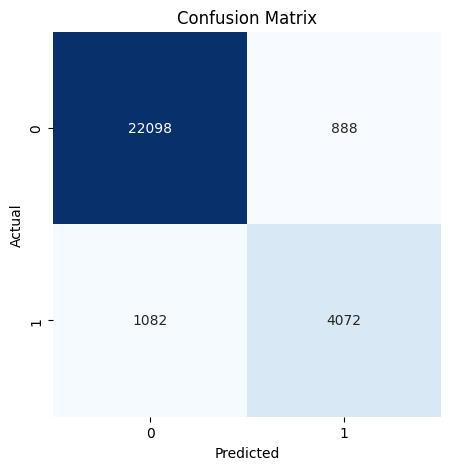

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = model = RandomForestClassifier(
    n_estimators=500,           
    max_depth=12,               
    min_samples_split=3,        
    min_samples_leaf=4,                 
    random_state=42,
    n_jobs=-1
) 

predict(X_train, y_train, X_val, y_val, rf_model)

In [43]:
columns_to_drop_15_test = [
    "Profession_new_Trades & Services",
    "City",
    "Profession_new_Research & Analysis",
    "Profession_new_Engineering & Technology",
    "Profession_new_Student & Academic",
    "Profession_new_Law",
    "Degree_new_Diploma",
    "Degree_new_Doctorate",
    "Degree_new_Unknown",
    "Degree_new_Law",
    "Degree_new_Other",
    "id",
    "Name"
]

new_test= test.drop(columns=columns_to_drop_15_test)

X=train.drop(columns=columns_to_drop)
y=train['Depression']

final_model = RandomForestClassifier(
    n_estimators=500,           
    max_depth=12,               
    min_samples_split=3,        
    min_samples_leaf=4,                 
    random_state=42,
    n_jobs=-1
)
final_model.fit(X,y)

predictions = final_model.predict(new_test)

In [44]:
predictions

array([0., 0., 0., ..., 0., 1., 0.])

In [45]:
submission["Depression"] = predictions.astype(int)

In [46]:
submission

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [47]:
submission["Depression"].value_counts()

Depression
0    77374
1    16426
Name: count, dtype: int64

In [ ]:
submission.to_csv("Submission_17.csv",index=False)